In [16]:
import sqlite3 as sqlite
import pandas as pd

con = sqlite.connect('../data/checking-logs.sqlite')

In [17]:
query = '''
    SELECT
        hour,
        avg(commits) as avg_commits,
        strftime('%w', date) NOT IN ('6', '0') as is_wd
    FROM 
        (
            SELECT 
                date(timestamp) as date, 
                CAST(strftime('%H', timestamp) as INT) as hour,
                count(*) as commits
            FROM checker 
            WHERE uid LIKE 'user_%' 
            GROUP BY date, hour
        )
    GROUP BY hour, is_wd
'''
df = pd.read_sql(query, con, parse_dates=['datetime'])
df

,hour,avg_commits,is_wd
0,0,2.000000,0
1,0,3.000000,1
2,1,6.000000,0
3,3,1.000000,0
4,3,2.000000,1
5,5,2.000000,0
6,5,7.500000,1
7,6,1.500000,1
8,7,4.000000,0
9,7,5.166667,1


array([<AxesSubplot:title={'center':'weekend'}, xlabel='hour'>,
       <AxesSubplot:title={'center':'working_day'}, xlabel='hour'>],
      dtype=object)

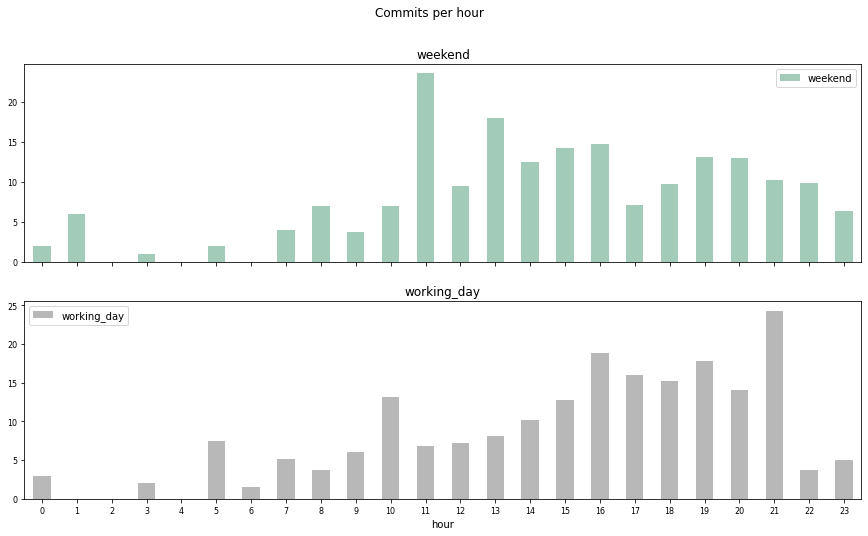

In [18]:
weekend = df[df['is_wd'] == 0].set_index('hour')['avg_commits']
working_days = df[df['is_wd'] == 1].set_index('hour')['avg_commits']
data = pd.DataFrame({'weekend':weekend,'working_day': working_days}, index=range(24))
data
data.index.rename('hour', inplace=True)
data.fillna(0)
data.plot.bar(subplots=True, fontsize=8, figsize=(15,8), rot=0, title='Commits per hour',color=['#A2CBB9', '#B8B8B8'])



Is the dynamic different on working days and weekends? 
11 - weekend
21 - working day

In [19]:
con.close()